# Import Libraries

In [1]:
import pandas as pd
from pandas import DataFrame
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import numpy as np
from selenium.webdriver.chrome.service import Service
import os
import time
import yfinance as yf
import matplotlib.pyplot as plt

from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService



# Get Online Data

In [2]:
service = Service()
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)

ticker = "googl"

driver.get("https://www.morningstar.com/stocks/xnas/"+ticker+"/key-metrics")

time.sleep(30)

driver.implicitly_wait(100000)

panda = pd.read_html(driver.page_source)

driver.implicitly_wait(40)


driver.quit()

There was an error managing chromedriver (error sending request for url (https://googlechromelabs.github.io/chrome-for-testing/known-good-versions-with-downloads.json)); using driver found in the cache
C:\Users\diego\AppData\Local\Temp\ipykernel_21476\2347400337.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  panda = pd.read_html(driver.page_source)


In [3]:

driver = webdriver.Chrome(service=service, options=options)

driver.get("https://www.morningstar.com/stocks/xnas/"+ticker+"/valuation")

time.sleep(30)

driver.implicitly_wait(100000)

valuationpd = pd.read_html(driver.page_source)

driver.implicitly_wait(40)

driver.quit()

C:\Users\diego\AppData\Local\Temp\ipykernel_21476\2070162614.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  valuationpd = pd.read_html(driver.page_source)


# Create the Dataframes form the data

In [4]:
#Create DataFrames from the webpage tables
morning1 = DataFrame(panda[0])
morning2 = DataFrame(panda[1])
morning3 = DataFrame(panda[2])
val1df = DataFrame(valuationpd[0])

#Drop NaN values
morning1.dropna(inplace = True)
morning2.dropna(inplace = True)
morning3.dropna(inplace = True)
val1df.dropna(inplace = True)

#Set the first colum as the index
morning1.set_index(morning1.columns[0], inplace = True)
morning2.set_index(morning2.columns[0], inplace = True)
morning3.set_index(morning3.columns[0], inplace = True)
val1df.set_index(val1df.columns[0], inplace = True)

#Transpose the DataFrames
morning1 = morning1.T
morning2 = morning2.T
morning3 = morning3.T
val1df = val1df.T

#Replace - for Nan values
morning1 = morning1.replace("—", np.nan, regex=True)
morning2 = morning2.replace("—", np.nan, regex=True)
morning3 = morning3.replace("—", np.nan, regex=True)
val1df= val1df.replace("—", np.nan, regex=True)

In [5]:
morning1

"Income Statement (in Bil, except ratios)",Revenue,Revenue Growth %,Gross Profit,Gross Profit Margin %,Operating Income,Operating Margin %,EBIT,EBIT Margin %,EBITDA,EBITDA Margin %,Net Income,Net Profit Margin %,Basic EPS,Diluted EPS,Normalized EPS,Total Dividends per Share
06/30/2025,371.40,13.13%,218.91,58.94%,121.37,32.68%,135.69,36.54%,153.37,41.29%,115.57,31.12%,9.47,9.39,8.55,0.81
12/2024,350.02,13.87%,203.71,58.20%,112.39,32.11%,115.60,33.03%,130.91,37.40%,100.12,28.60%,8.13,8.04,7.94,0.60
12/2023,307.39,8.68%,174.06,56.63%,84.29,27.42%,82.16,26.73%,94.11,30.61%,73.80,24.01%,5.84,5.80,6.05,NaN
12/2022,282.84,9.78%,156.63,55.38%,74.84,26.46%,69.51,24.58%,85.44,30.21%,59.97,21.20%,4.59,4.56,4.90,NaN
12/2021,257.64,41.15%,146.70,56.94%,78.71,30.55%,89.58,34.77%,102.02,39.60%,76.03,29.51%,5.69,5.61,4.92,NaN
12/2020,182.53,12.77%,97.80,53.58%,41.22,22.59%,46.35,25.39%,60.05,32.90%,40.27,22.06%,2.96,2.93,2.58,NaN


In [6]:
morning2

"Balance Sheet (in Bil, except ratios)",Total Assets,Total Liabilities,Total Debt,Total Equity,Cash And Cash Equivalents,Working Capital,Shares Outstanding (Bil),Book Value Per Share,Total Debt To Equity
06/30/2025,502.05,139.14,35.56,362.92,21.04,78.91,12.24,29.98,0.10
12/2024,450.26,125.17,25.46,325.08,23.47,74.59,12.24,26.62,0.08
12/2023,402.39,119.01,28.50,283.38,24.05,89.72,12.52,22.74,0.10
12/2022,365.26,109.12,29.68,256.14,21.88,95.50,12.94,19.93,0.12
12/2021,359.27,107.63,28.40,251.64,20.95,123.89,13.28,19.00,0.11
12/2020,319.62,97.07,26.77,222.54,26.47,117.46,13.53,16.48,0.12


In [7]:
morning3

"Cash Flow Statement (in Bil, except ratios)",Cash From Operating Activities,Cash From Investing Activities,Cash From Financing Activities,Capital Expenditures,Free Cash Flow,Change in Cash
06/30/2025,133.71,-74.93,-65.16,66.98,75.27,-6.38
12/2024,125.30,-45.54,-79.73,52.54,81.17,0.03
12/2023,101.75,-27.06,-72.09,32.25,73.34,2.59
12/2022,91.50,-20.30,-69.76,31.49,62.25,1.44
12/2021,91.65,-35.52,-61.36,24.64,68.54,-5.23
12/2020,65.12,-32.77,-24.41,22.28,41.02,7.94


In [8]:
val1df

Calendar,Price/Sales,Price/Earnings,Price/Cash Flow,Price/Book
2015,7.49,36.58,21.65,4.60
2016,6.47,29.01,17.17,4.07
2017,7.07,35.24,20.70,4.66
2018,5.67,39.21,23.36,4.28
2019,6.05,28.75,18.55,4.75
2020,7.04,33.89,20.86,5.58
2021,8.24,27.92,22.66,7.87
2022,4.15,17.53,12.01,4.51
2023,6.02,26.76,17.93,6.41
2024,6.97,25.11,18.66,7.39


# Create new Dataframes and Get a suggested Buy price

In [9]:
Ebitlist = []
Equitylist = []
Debtlist = []
Cashlist = []
for i in range(len(morning1)):
    Ebitlist.append(float(morning1["EBIT"].iloc[i]))
    Equitylist.append(float(morning2["Total Equity"].iloc[i]))
    Debtlist.append(float(morning2["Total Debt"].iloc[i]))
    Cashlist.append(float(morning2["Cash And Cash Equivalents"].iloc[i]))

In [10]:
RoicDf = DataFrame({
    "EBIT": Ebitlist,
    "Equity": Equitylist,
    "Debt": Debtlist,
    "Cash": Cashlist})

RoicDf.set_index(morning1.index, inplace=True)

RoicDf["ROIC"] = RoicDf["EBIT"] / (RoicDf["Equity"] + RoicDf["Debt"] - RoicDf["Cash"])



In [11]:
RoicDf

,EBIT,Equity,Debt,Cash,ROIC
06/30/2025,135.69,362.92,35.56,21.04,0.359501
12/2024,115.60,325.08,25.46,23.47,0.353441
12/2023,82.16,283.38,28.50,24.05,0.285446
12/2022,69.51,256.14,29.68,21.88,0.263355
12/2021,89.58,251.64,28.40,20.95,0.345749
12/2020,46.35,222.54,26.77,26.47,0.207997


In [12]:
GrowthEPSlist = []
for i in range(len(morning1)-1):
    GrowthEPSlist.append((float(morning1["Basic EPS"].iloc[i]) - float(morning1["Basic EPS"].iloc[i+1])) / float(morning1["Basic EPS"].iloc[i+1]))
GrowthEPSlist.append(np.nan)

Revenuelist = list(morning1["Revenue Growth %"])
Revenuelist = [float(i[:-1]) for i in Revenuelist] 

GrowthDf = DataFrame({
    "YOY Revenue Growth": Revenuelist,
    "YOY EPS Growth": GrowthEPSlist,  
})

GrowthDf.set_index(morning1.index, inplace=True)

In [13]:
GrowthDf

,YOY Revenue Growth,YOY EPS Growth
06/30/2025,13.13,0.164822
12/2024,13.87,0.392123
12/2023,8.68,0.272331
12/2022,9.78,-0.193322
12/2021,41.15,0.922297
12/2020,12.77,NaN


In [14]:
Eps = float(morning1["Basic EPS"].iloc[0])
Gr = float(GrowthDf["YOY Revenue Growth"].mean())
Pe = float(val1df["Price/Earnings"].iloc[11])
BuyPrice = ( (Eps*(1+(Gr/100))**(10) * Pe)/(1.15**10) ) 
MoCBuyPrice = BuyPrice/2

In [15]:
BuyPrice

270.2174787507667

In [16]:
MoCBuyPrice

135.10873937538335

In [17]:
data = yf.download(
    tickers = ticker,
    start="2025-01-01",
    end="2025-07-31",
    #period="max",
    interval="1d",
    ignore_tz=True,
    auto_adjust=True)

actualPrice = data["Close"].iloc[-1,0].item()

[*********************100%***********************]  1 of 1 completed


In [18]:
actualPrice

196.52999877929688

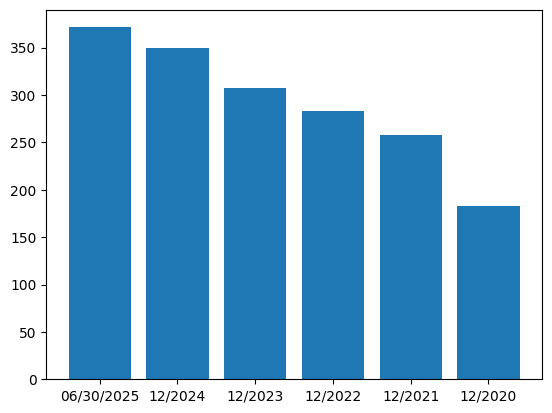

In [19]:

import matplotlib.pyplot as plt

data = morning1["Revenue"].astype(float).tolist()
plt.bar(morning1.index.tolist(), data)
plt.show()   

In [38]:
morning1["Net Profit Margin %"].iloc[5] = float(morning1["Net Profit Margin %"].iloc[5][:-1])

In [51]:
GrowthDf

,YOY Revenue Growth,YOY EPS Growth
06/30/2025,13.13,0.164822
12/2024,13.87,0.392123
12/2023,8.68,0.272331
12/2022,9.78,-0.193322
12/2021,41.15,0.922297
12/2020,12.77,NaN


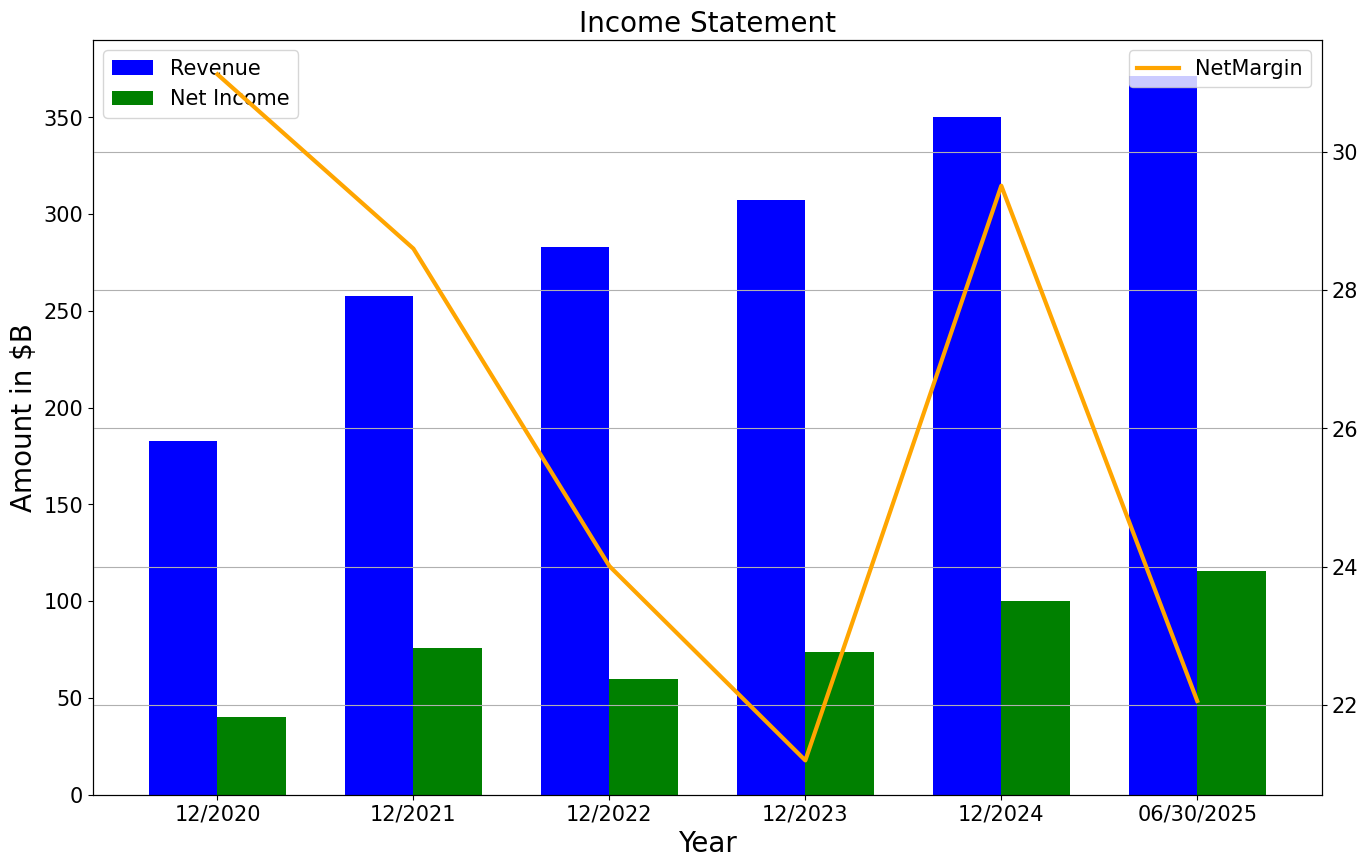

In [ ]:
#-------------------------------------------GRAPH------------------------------------
labels = morning1.index[::-1]
#-------------------------------------COLUMNS---------------------
col1 = morning1["Revenue"].iloc[::-1].astype(float)
col2 = morning1["Net Income"].iloc[::-1].astype(float)

#-------------------------------------LABELS--------------------------
x = np.arange(len(labels))
width = 0.35

#--------------------------------First axis columns-----------------------------------
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, col1, width, label='Revenue', color = "blue")
rects2 = ax.bar(x + width/2, col2, width, label = 'Net Income', color = "green")
ax.set_title('Income Statement')
ax.legend()
ax.legend(fontsize = 15)
ax.title.set_fontsize(20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Amount in $B', fontsize = 20)
plt.xticks(x, labels,  fontsize=15)

#--------------------------------Second axis plot NETMARGIN--------------------------------
ax3 = plt.twinx()
line3 = ax3.plot(morning1["Net Profit Margin %"], lw = 3, label = "NetMargin", color = "orange")
ax3.legend(loc=1, fontsize = 15)
ax3.yaxis.set_tick_params(labelsize=15)

#--------------------------------Third axis plot GROWTH----------------------------------
#ax2 = plt.twinx()
#line1 = ax2.plot(GrowthDf["YOY Revenue Growth"], lw = 5, label = "RevGrowth")
#line2 = ax2.plot(GrowthDf["YOY EPS Growth"], lw = 5, label = "NetGrowth")
#ax2.legend(loc=9, fontsize = 15)
#ax2.yaxis.set_tick_params(labelsize=20)
#ax2.set_ylabel('Growth%', fontsize =20)

#-----------------------------Graph size-----------------------
fig.set_size_inches(16, 10)


#--------------------------------------------TABLE------------------------------
#cell_text = ISsimpdf.T.values.tolist()
#columns = ISsimpdf.index.tolist()
#rows = ["Revenue", "Net Income", "RevGrowth", "NetGrowth", "NetMargin"]
#colors = ["white", "greenyellow", "blue", "orange", "darkturquoise"]

#the_table = plt.table(cellText=cell_text,
#                      rowLabels=rows,
#                      colLabels=columns,
#                      rowColours = colors,
#                      loc='bottom', fontsize = 25)
#the_table.set_fontsize(20)

#the_table.scale(1,3)


#--------------------------------------DELETE-BOTTOM-TICKS----------------
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False)

fig.tight_layout()
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.grid(axis = "y")
plt.show()

In [57]:
morning1

"Income Statement (in Bil, except ratios)",Revenue,Revenue Growth %,Gross Profit,Gross Profit Margin %,Operating Income,Operating Margin %,EBIT,EBIT Margin %,EBITDA,EBITDA Margin %,Net Income,Net Profit Margin %,Basic EPS,Diluted EPS,Normalized EPS,Total Dividends per Share
06/30/2025,371.40,13.13%,218.91,58.94%,121.37,32.68%,135.69,36.54%,153.37,41.29%,115.57,31.12,9.47,9.39,8.55,0.81
12/2024,350.02,13.87%,203.71,58.20%,112.39,32.11%,115.60,33.03%,130.91,37.40%,100.12,28.6,8.13,8.04,7.94,0.60
12/2023,307.39,8.68%,174.06,56.63%,84.29,27.42%,82.16,26.73%,94.11,30.61%,73.80,24.01,5.84,5.80,6.05,NaN
12/2022,282.84,9.78%,156.63,55.38%,74.84,26.46%,69.51,24.58%,85.44,30.21%,59.97,21.2,4.59,4.56,4.90,NaN
12/2021,257.64,41.15%,146.70,56.94%,78.71,30.55%,89.58,34.77%,102.02,39.60%,76.03,29.51,5.69,5.61,4.92,NaN
12/2020,182.53,12.77%,97.80,53.58%,41.22,22.59%,46.35,25.39%,60.05,32.90%,40.27,22.06,2.96,2.93,2.58,NaN


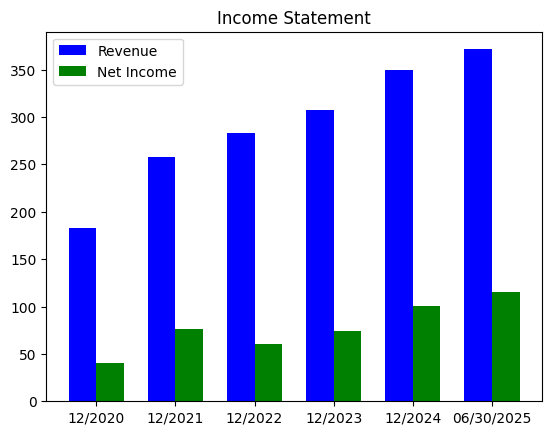

In [107]:
#-------------------------------------------GRAPH------------------------------------
labels = morning1.index[::-1]
#-------------------------------------COLUMNS---------------------
col1 = morning1["Revenue"].iloc[::-1].astype(float)
col2 = morning1["Net Income"].iloc[::-1].astype(float)

#-------------------------------------LABELS--------------------------
x = np.arange(len(labels))
width = 0.35

#--------------------------------First axis columns-----------------------------------
fig, ax = plt.subplots() 
rects1 = ax.bar(labels, col1, width=-width, label='Revenue', color = "blue", align='edge')
rects2 = ax.bar(labels, col2, width=width, label = 'Net Income', color = "green", align='edge')
ax.set_title('Income Statement')
ax.legend()
#ax.legend(fontsize = 15)
#ax.title.set_fontsize(20)
#ax.yaxis.set_tick_params(labelsize=15)


#ax.set_ylim(0, 250)
plt.show()

Bill Depth
Bill Length
Flipper Length


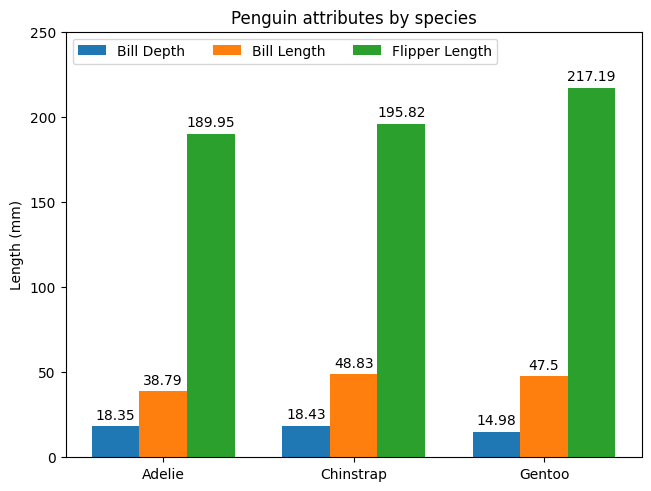

In [95]:
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    print(attribute)
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

In [ ]:
morning1["Revenue"].iloc[::-1]

'182.53'